# **Sistemi di Apprendimento Supervisionato**
## **Regressione Lineare e Logistica**
Quelli di **apprendimento supervisionato** sono probabilmente tra i sistemi di machine learning più diffusi, soprattutto a causa dei numerosi casi d'uso disponibili. Abbiamo detto che esistono fondamentalmente due tipi di tecniche di apprendimento supervisionato, ovvero *regressione* e *classificazione*. Vediamole maggiormente nel dettaglio.

## **Regressione Lineare**

### **Rappresentazione analitica del Modello**

A tutti noi è intuitivamente noto che i millimetri di pioggia che cadono sono in qualche modo correlati alle temperature medie che abbiamo durante la giornata. Immaginiamo quindi di avere un dataset che contenga al suo interno i dati medi sui millimetri di pioggia degli ultimi dieci anni per undici valori differenti di temperatura. Se provassimo a visualizzare i dati mediante un `relplot()`, otterremmo la seguente figura.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as npù

In [2]:
meteo = pd.DataFrame(
    [[10, 22],
    [14, 21],
    [16, 17],
    [18, 13],
    [20, 15],
    [22, 12],
    [24, 11],
    [26, 10],
    [28, 7],
    [30, 1]], columns=['Gradi', 'Pioggia (mm)'])

meteo

,Gradi,Pioggia (mm)
0,10,22
1,14,21
2,16,17
3,18,13
4,20,15
5,22,12
6,24,11
7,26,10
8,28,7
9,30,1


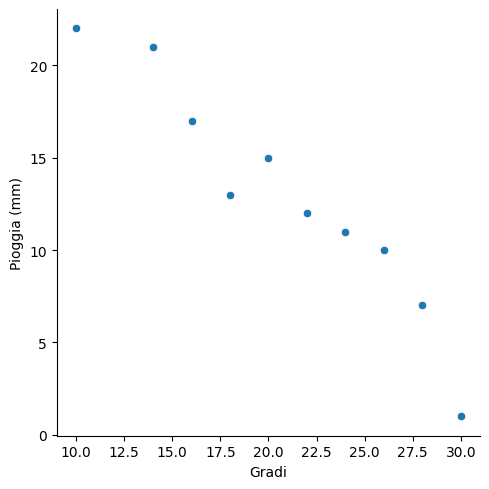

In [3]:
sns.relplot(data=meteo, x='Gradi', y='Pioggia (mm)')

In [4]:
sns.lmplot(data=meteo, x='Gradi', y='Pioggia (mm)')

Notiamo subito che, come prevedibile, i millimetri di pioggia attesi diminuiscono all'aumentare della temperatura, andando a definire una sorta di **relazione lineare** tra i dati sull'asse delle ascisse (ovvero i gradi) e quelli sull'asse delle ordinate (ovvero la pioggia).

Ovviamente, la retta di regressione non tocca direttamente tutti i punti, ma li approssima. Possiamo quindi dire che la relazione tra gradi e mm di pioggia è riconducibile ad una forma del tipo:

$$y=mx+b$$

Dove:
- $y$  sono i millimetri di pioggia medi caduti nell'arco di tutte le giornate con un dato valore medio di temperatura
- $x$  è il valore medio di temperatura
- $m$  è il coefficiente angolare della retta di regressione
- $b$ è l'incercetta della retta di regressione.

Questa notazione analitica si traduce in un modello usando la seguente notazione:

$$y'=b+w_1x_1$$

Dove:
- $y'$ è l'**output predetto** dal modello
- $b$ è il **bias**, equivalente al concetto analitico di intercetta;
- $w_1$  è il **peso** della prima feature, equivalente al concetto analitico di coefficiente angolare;
- $x_1$è è il **valore di ingresso** assunto dalla *prima feature*.

Per *inferire* un nuovo valore di $y'$ ci basterà quindi cambiare il valore assunto da $x_1$. In pratica, potremo prevedere che per una temperatura di 8 gradi, avremo un valore di precipitazioni pari a 25 mm, mentre per una temperatura di 32 gradi il valore di precipitazioni sarà pari a 0.


In questo caso, abbiamo presupposto che vi sia un'**unica variabile indipendente**, o **feature**, a determinare il valore dell'output. Esistono ovviamente casi più complessi, nei quali il valore di  è determinato a partire da più feature come $y'=b+w_1x_1+...+w_nx_n$.

### **Addestramento e Funzione di costo**

**Addestrare** un modello significa fare in modo che determini dei *valori ottimali* per tutti i pesi ed i bias a partire dagli esempi dotati di label. Per determinare tali valori, i modelli ad apprendimento supervisionato provano ad esaminare iterativamente tutti i campioni presenti nel set di addestramento alla ricerca di un modo per minimizzare un **costo**, il quale rappresenta una certa *penalità* assegnata al modello in caso di predizione errata.

In pratica, il costo (o, in inglese, **loss**) è un numero che determina se la predizione effettuata dal modello su un singolo è stata più o meno conforme alla label assegnata. In caso di predizione perfetta, la loss è pari a 0

Tuttavia, nel caso la predizione sia sbagliata, la loss sarà tanto più grande quanto più il valore predetto sarà divergente dal valore atteso.

Per calcolare la loss complessiva del modello su un insieme di campioni è possibile utilizzare una **funzione di costo**, o **loss function**. Esistono molteplici esempi di funzioni di costo; tuttavia, uno dei più semplici da comprendere è l'**errore quadratico medio**, calcolato a partire dalla seguente formula:

$$MSE = \frac{1}{N}\sum_{(x,y)\in D}(y-y')^2$$

- $(x,y)$ è una coppia di feature e label;
- $y'$ è il valore predetto della label a partire dall'applicazione del modello;
- $D$  è il nostro dataset etichettato;
- $N$è è il numero di campioni prensenti nel dataset

In pratica, l'MSE è tanto più alto quanto maggiore è la distanza quadratica complessiva tra ogni label "vera" ed il rispettivo valore predetto dall'algoritmo di machine learning.


Gli **algoritmi di machine learning** tendono ad essere addestrati seguendo un **approccio iterativo**, che prevede che al termine di ciascuna iterazione i valori dei pesi siano aggiornati in maniera da ridurre ulteriormente il valore della funzione di costo. Questo è riassumibile nel seguente schema:

![weight_upgrade](Images/weight_upgrade.png)

In pratica, durante l'addestramento, ad ogni iterazione il modello effettua una predizione sulle feature. Questa predizione viene comparata con la label, e la loss viene calcolata. I pesi sono quindi aggiornati in base ad una determinata **regola di ottimizzazione**, ed il ciclo si ripete.

Le iterazioni non sono infinite: normalmente, si imposta un numero preciso di **epoche di training**, oppure si aspetta che l'algoritmo arrivi ad una sorta di "convergenza", nella quale il valore della loss non decresce ulteriormente.

### **Ottimizzazioen della funzione di Loss**

Abbiamo in precedenza accennato al fatto che l'aggiornamento dei pesi segue una certa regola di ottimizzazione volta a minimizzare la loss. Ne esistono diverse versioni, ma in generale si rifanno al concetto di **discesa di gradiente**, illustrato nella seguente immagine.

![discesa_gradiente](Images/discesa_gradiente.png)

Spieghiamo brevemente cosa accade guardando da sinistra verso destra.

Possiamo immaginare la funzione che modella la nostra loss come una sorta di paraboloide, dotato di un **valore minimo** prossimo allo zero che viene raggiunto in corrispondenza di una determinata combinazione dei valori dei pesi.

Ipotizzando di trovarci all'*inizio dell'addestramento* nella situazione raffigurata nella figura a sinistra, ovvero con dei pesi nel ramo sinistro del paraboloide, il nostro obiettivo sarà quello di muoverci verso "destra", ovvero verso il **minimo globale** della funzione. Per farlo, intuitivamente, dovremo valutare la derivata o, nel caso di funzioni ad N dimensioni, con N numero di feature, il **gradiente della nostra funzione di costo**, ed aggiornare i pesi in maniera tale che questo assuma, alla successiva iterazione, un valore inferiore.

Questo aggiornamento ci porta alla figura centrale, in cui vediamo che il gradiente si è spostato dal punto rosso al punto blu. In questa iterazione dovremo ancora aumentare il valore dei pesi affinchè il valore della funzione di costo diminuisca, portandoci quindi nella situazione raffigurata nella figura a destra.

In quest'ultima situazione vedremo che il segno del gradiente sarà diventato positivo, in quanto ci troveremo su una parte ascendente del paraboloide; di conseguenza, dovremo diminuire i pesi per far convergere l'algoritmo.

Il "quantitativo" di cui sono aggiornati i pesi è spesso denotato come **learning rate**.

Un learning rate *troppo basso* porta ad una convergenza molto lenta dell'algoritmo, che potrebbe "esaurire" le iterazioni prima di arrivare al minimo della funzione di costo. 

Un learning rate *eccessivamente alto* potrebbe invece fare in modo che l'algoritmo "salti" da una parte all'altra del minimo, non arrivando neanche in questo caso a convergenza.

Il nostro banale esempio presuppone che la funzione di costo non abbia alcun **minimo locale**. Ciò non è ovviamente vero, e delle scelte sbagliate in termini di punto di partenza o learning rate potrebbero farci finire all'interno di un minimo locale, impedendoci di arrivare a convergenza.

### **Overfitting e regolarizzazione**

Alle volte, accade che il nostro modello sia in grado di arrivare ad una loss estremamente bassa sui dati di training, ma che tuttavia inizia ad aumentare sui dati di validazione, un po' come nella figura successiva:


![discesa_gradiente](Images/reg.png)

Ciò può accadere per diversi motivi, come errori nei parametri di addestramento o dati non ben bilanciati. Ad ogni modo, questo fenomeno prende il nome di **overfitting**, e comporta che il modello, che si comporta benissimo sui *dati di training*, non riesca a **generalizzare**, comportandosi in maniera meno egregia sui *dati di validazione*.

L'overfitting si manifesta all'aumentare delle epoche di training, quando il nostro modello diventa sempre più "complesso", ed apprende sempre meglio a caratterizzare relazioni di complessità crescente intercorrenti tra feature e label.

Per arginare il fenomeno dell'overfitting, oltre ad agire sui dati e sui parametri del modello, si inserisce spesso un **termine di regolarizzazione**, che tende a penalizzare un modello in grado di caratterizzare relazioni eccessivamente complesse.

Il termine di regolarizzazione interviene direttamente sul valore trattato dall'ottimizzatore, che non avrà più come unico obiettivo quello di minimizzare la loss, ma quello di *minimizzare congiuntamente la loss e la complessità del modello ottenuto*.

Il caso più semplice è la **regolalizzazione $L_2$**, definita come la somma dei quadrati dei pesi associati alle feature:

$$L_2=w_1^2+w_2^2+...+w_n^2$$

Minimizzare questo termine significa dare meno "importanza" ad alcuni pesi che inficiano la complessità totale del modello.

### **Regressione Lineare in Scikit Learn**

La **regressione lineare** in Scikit Learn è implementata mediante gli oggetti di classe `LinearRegression()` contenuti all'interno del package `linear_model` della libreria.

Oggetti di questo tipo sono degli *estimator*.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, RANSACRegressor

#### **Es 2.0**

Considero il caso visto precedentemetne dei dati metereologici:

In [6]:
meteo = pd.DataFrame(
    [[10, 22],
    [14, 21],
    [16, 17],
    [18, 13],
    [20, 15],
    [22, 12],
    [24, 11],
    [26, 10],
    [28, 7],
    [30, 1]], columns=['Gradi', 'Pioggia (mm)'])

meteo

,Gradi,Pioggia (mm)
0,10,22
1,14,21
2,16,17
3,18,13
4,20,15
5,22,12
6,24,11
7,26,10
8,28,7
9,30,1


In [7]:
reg = LinearRegression()
reg.fit(meteo['Gradi'].values.reshape(-1, 1), meteo['Pioggia (mm)'].values.reshape(-1, 1))
score = round(reg.score(meteo['Gradi'].values.reshape(-1, 1), meteo['Pioggia (mm)'].values.reshape(-1, 1)), 2)

Nel codice precedente stiamo creando un oggetto di classe `LinearRegression()`. Per effettuare l'addestramento del nostro modello, dovremo chiamare il metodo `fit` di reg passandogli le colonne del DataFrame *meteo*.
Fatto questo, l'istanza reg sarà stata regolarmente addestrata, e sarà pronta per effettuare le predizioni.

In tal senso, dovremo usare il metodo `predict()`:

In [8]:
pioggia_pred = reg.predict(meteo['Gradi'].values.reshape(-1, 1))

Per accedere ai parametri dello stimatore (ovvero al coefficiente angolare ed all'intercetta) dovremo usare gli attributi `coef_` ed `intercept_`.

Inoltre la classe `LinearRegression()` ci mette a disposizione anche il metodo `score()`, che ci permette di ottenere il coefficiente $R^2$ ottenuto dal modello di regressione. Questo è pari a:

$$R^2=(1-\frac{u}{v})$$

dove:

- $u$ è pari alla sommatoria dei quadrati dei residui, ovvero $\sum_{}(y-y')^2$
- $v$ è pari alla sommatoria della differenza tra i valori veri ed il valor medio, ovvero $\sum_{}[y-\mu (y)]^2$

Conoscere il valore di $R^2$ è importante per avere un'idea della bontà del modello. Nel caso ideale, infatti, questo valore è 1, mentre valori inferiori (o addirittura negativi) rappresentano delle possibili criticità del modello.

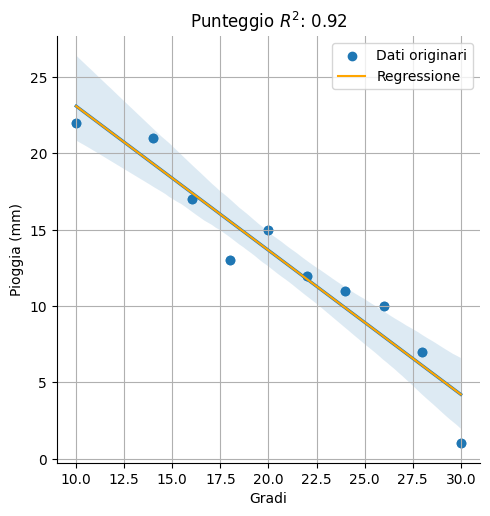

In [9]:
plt.scatter(meteo['Gradi'].values.reshape(-1, 1), meteo['Pioggia (mm)'].values.reshape(-1, 1), label='Dati originari')
plt.plot(meteo['Gradi'].values.reshape(-1, 1), pioggia_pred, color='orange', label='Regressione')
plt.legend()
plt.title(f'Punteggio $R^2$: {score}')
plt.xlabel('Gradi')
plt.ylabel('Pioggia (mm)')
plt.grid()
plt.show()

#### **Es 2.1**

Proviamo ad operare sul dataset Tips di Seaborn, effettuando una regressione lineare che riguardi le mance ed il conto totale. Per farlo, usiamo un oggetto di classe LinearRegression() messo a disposizione dal package linear_model di Scikit Learn.

Valutiamo lo score $R^2$  ottenuto, e mostriamo a schermo i risultati dell'interpolazione, assieme al coefficiente angolare ed all'intercetta ottenuti.

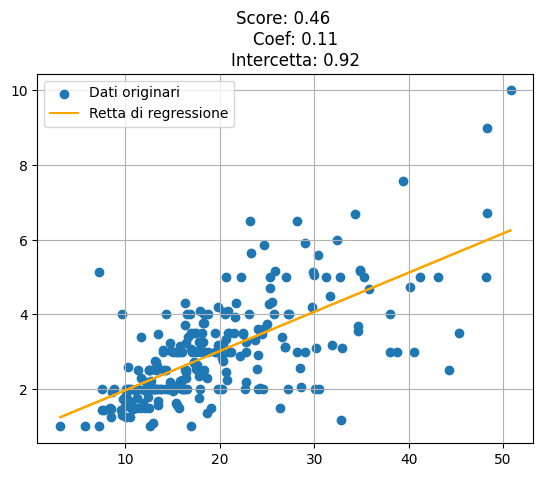

In [10]:
# Carico il dataset
df = sns.load_dataset('tips')

lin_reg = LinearRegression()
X = df['total_bill'].values.reshape(-1, 1)
y = df['tip'].values.reshape(-1, 1)
# Addestro l'istanza lin_reg (il regressore)
lin_reg.fit(X, y)
#Effettuo una predizione dei valori dandogli la colonna x
y_pred = lin_reg.predict(X)
score = lin_reg.score(X, y)

#Plot dei risultati
plt.scatter(X, y, label='Dati originari')
plt.plot(X, y_pred, color='orange', label='Retta di regressione')
plt.legend()
plt.grid()
plt.title(f'''Score: {round(score, 2)} 
    Coef: {round(lin_reg.coef_[0][0], 2)}
    Intercetta: {round(lin_reg.intercept_[0], 2)}''') # coef e intercept sono contenute in liste di liste, per questo uso [i][i]
plt.show()

#### **Es 2.2**

L'**algoritmo RANSAC (RANdom SAmple Consensus)** permette di effettuare una regressione in quattro step.

1. Per prima cosa, viene scelto un sottoinsieme dei dati iniziali.
2. Viene stimato un modello a partire dal sottoinsieme considerato nel punto 1.
3. Tutti i dati sono classificati come inlier o outlier sulla base di un valore di soglia.
4. Se il modello ha un numero di outlier inferiore a quello estrapolato dal modello all'iterazione precedente, viene aggiornato il "modello migliore", e si passa all'iterazione successiva.

Proviamo ad effettuare poi un'interpolazione mediante un oggetto di classe RANSACRegression(), e confrontiamo i risultati ottenuti in precedenza in tre modi:

- tramite un plot;
- valutando lo score;
- valutando i valori di coefficiente ed intercetta del modello usato.

Proviamo infine ad eseguire due volte il RANSAC, e verifichiamo che i risultati ottenuti siano differenti.

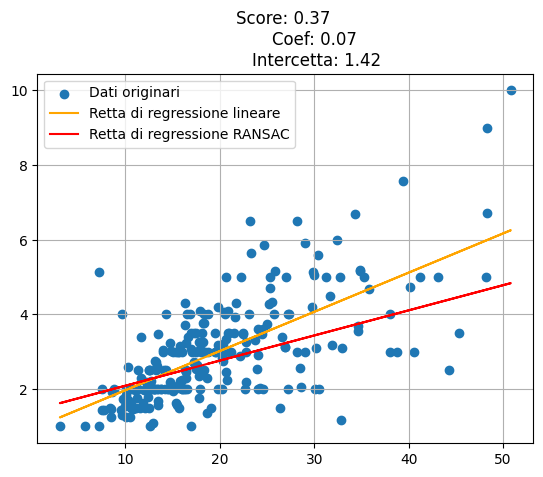

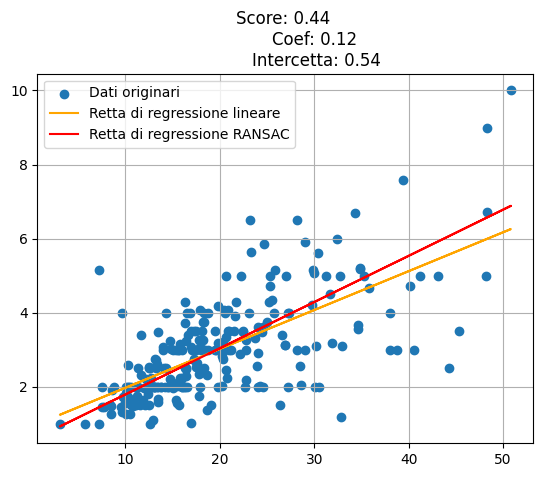

In [11]:
def fit_plot_ransac(X, y, y_pred, ran_reg, n_iters=3):
    """ Fitta e plotta un ransac.
    """
    for i in range(n_iters):
        ran_reg = RANSACRegressor()
        ran_reg.fit(X, y)
        score = ran_reg.score(X, y)
        y_pred_ran = ran_reg.predict(X)
        plt.scatter(
            X,
            y,
            label='Dati originari')
        plt.plot(
            X,
            y_pred,
            color='orange',
            label='Retta di regressione lineare')
        plt.plot(
            X,
            y_pred_ran,
            color='red',
            label='Retta di regressione RANSAC')
        plt.legend()
        plt.grid()
        plt.title(f'''Score: {round(score, 2)} 
            Coef: {round(ran_reg.estimator_.coef_[0][0], 2)} 
            Intercetta: {round(ran_reg.estimator_.intercept_[0], 2)}''')
        plt.show()

ran_reg = RANSACRegressor()
fit_plot_ransac(X, y, y_pred, ran_reg, n_iters=2)

## **Regressione Logistica**

Esistono diversi problemi, tra cui quelli di classificazione multiclasse, che richiedono che l'uscita del sistema sia una stima di probabilità; per far questo, la **regressione logistica** è lo strumento "principe" da utilizzare. Nonostante si chiami regressione, non è effettivamente una regressione, ma serve per predire la probabilità che un oggetto sia all'interno di una certa classe.

Per comprenderne il funzionamento, supponiamo di creare un modello di **regressione logistica** che predica la *probabilità* che una mail ricevuta da un indirizzo sconosciuto sia di spam. Chiameremo questa probabilità come:

$$p(mail|unknown)$$

Se il modello afferma che la probabilità $p(mail|unknown)=0.05$ , allora su $100$ mail ricevute da indirizzi sconosciuti, $5$ saranno di spam:

$$spam = p(mail|unknown)*mail_{rec}=0.05*100=5$$

### **La funzione sigmoidale**

Ci si potrebbe chiedere come un modello per la regressione logistica sia in grado di asicurarsi che l'uscita ricada sempre nell'intervallo tra 0 ed 1. In tal senso, questo è assicurato dall'uso della *funzione sigmoidale*, definita come segue:

$$y=\frac{1}{1+e^{-z}}$$

la cui formulazione grafica è la seguente:

![sigmpoid](Images\sigmoid.png)

Nell'espressione precedente, notiamo che:

- $y$ è l'uscita della regressione logistica;
- $z$ è pari, per un generico modello lineare, a $b+w_1x_1+...+w_nx_n$.

### **Regressione Logistica in Scikit Learn**

In Scikit Learn la regressione logistica è implementata mediante la classe `LogisticRegression()`.

E' importante sottolineare come la regressione logistica, nonostante il nome, si comporti a tutti gli effetti come un **classificatore**: di conseguenza, l'output del modello sarà una classe, e non un valore di regressione.

In [1]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

#### **Es 3.0**

Continuiamo ad operare sul dataset Tips di Seaborn.

In particolare, scegliamo come *label* il giorno, e come feature sulle quali operare il *conto totale*, la *mancia* e la *dimensione del tavolo*.

Addestriamo un classificatore a determinare qual è il giorno più probabile sulla base delle feature selezionate.

In [2]:
data = sns.load_dataset('tips')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Divido il DataSet in training e test:

In [16]:
X = data.loc[:, ('total_bill', 'tip', 'size')].values # Selezionamento delle features
y = data.loc[:, ('day')].values # label
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7) # Dividere il dataset in Test e Training (30% 70%)

Addestro il classificatore:

In [21]:
clf = LogisticRegression(max_iter=1000) #Istanzio un oggetto della classe LogisticRegression()
clf.fit(X_train, y_train) #Addestro il classificatore sui dati di training
y_pred = clf.predict(X_test) #Ovviamente la predizione la faccio sulle features di Test, valuto le sue capacità di generalizzazione

Non ho ancora usato le label di test, ossia *y_test* che userò insieme a *y_pred* per calcolare le **metriche** per valutare le performance del mio algoritmo.

In questo caso specifico sto calcolando in realtà non una vera e propria metrica, ma una **matrice di confusione**.

Nell'ambito dell'Intelligenza artificiale, la **matrice di confusione**, detta anche **tabella di errata classificazione**, restituisce una rappresentazione dell'**accuratezza di classificazione statistica**.

Ogni *colonna* della matrice rappresenta i *valori predetti*, mentre ogni *riga* rappresenta i *valori reali*. L'elemento sulla riga i e sulla colonna j è il *numero di casi* in cui il classificatore ha classificato la classe "vera" i come classe j. Attraverso questa matrice è osservabile se vi è "confusione" nella classificazione di diverse classi.

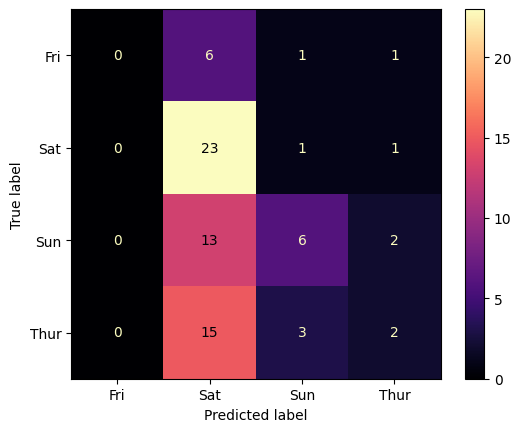

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='magma') # Più è diagonale meglio è